#### Loading loan Dataset into a dataframe

In [294]:

import numpy as np
import pandas as pd

* Load 'loan.csv' into a dataframe

In [295]:
df = pd.read_csv('loan/loan.csv')
df.shape

C:\Users\webnutshell\AppData\Local\Temp\ipykernel_18080\1125328809.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


(39717, 111)

In [296]:
# As this dataset has 111 columns resetting max_columns to be displayed as 150
pd.set_option('display.max_columns', 150)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Clean Data

In [297]:
## Determine cols having all null values
cols_having_all_nulls = [col for col in df.columns if df[col].isna().sum() == len(df)]
print(cols_having_all_nulls)
len(cols_having_all_nulls)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

54

In [298]:
## Drop all cols determined above
df = df.drop(cols_having_all_nulls, axis=1)
df.shape

(39717, 57)

In [299]:
df.info()
# Initial look at the dataset there are approximately 24 columns with object type
# Will need to verify the if object type columns need a datatype correction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### As there are 39717 rows, For columns where the amount of the null/NAN values are insignificant, simply remove those rows having these columns values as null/NAN


In [300]:
# Drop rows where the number of null values are insignificant
df = df[~df.chargeoff_within_12_mths.isna()]
df = df[~df.last_credit_pull_d.isna()]
df = df[~df.tax_liens.isna()]
df = df[~df.collections_12_mths_ex_med.isna()]
df = df[~df.revol_util.isna()]
df = df[~df.last_pymnt_d.isna()]
df = df[~df.pub_rec_bankruptcies.isna()]
df = df[~df.title.isna()]
df = df[~df.emp_title.isna()]
df = df[~df.emp_length.isna()]
df.shape
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12025
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

###  ***Drop un-required and unique Columns***
* Determine columns to be dropped:
    * next_pymnt_d as more than 90% of the values seems to NAN
    * mths_since_last_record as it has as more than 90% of the values seems to NAN

In [301]:
def drop_cols():
    # Dropping next_pymnt_d and mths_since_last_record as they are having more than 90$ values as NAN
    del df['next_pymnt_d']
    del df['mths_since_last_record']
    # Dropping purpose, desc, title as they dont really contribute to the EDA
    del df['purpose']
    del df['desc']
    del df['title']

drop_cols()

In [302]:
# Determines and drops columns which have all unique values
def drop_unique_cols():
    uniq_cols = [col for col in df.columns if df[col].nunique() == len(df.index)]
    print("Columns having all unique : ", uniq_cols)
    for cols in uniq_cols:
        del df[cols]

# Determines and drops columns having only 1 unique value
def drop_cols_having_only_1_unqiue_value():
    cols_having_only_1_unqiue_value = [col for col in df.columns if df[col].nunique() == 1]
    print("Columns having only 1 unique values: ", cols_having_only_1_unqiue_value)
    for cols in cols_having_only_1_unqiue_value:
        del df[cols]

drop_unique_cols()
drop_cols_having_only_1_unqiue_value()

Columns having all unique :  ['id', 'member_id', 'url']
Columns having only 1 unique values:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [303]:
mths_since_last_delinq_median = df.mths_since_last_delinq.median()
df.mths_since_last_delinq = df['mths_since_last_delinq'].fillna(mths_since_last_delinq_median)
df.mths_since_last_delinq.describe()


count    36431.000000
mean        35.723587
std         12.565155
min          0.000000
25%         35.000000
50%         35.000000
75%         35.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

## Fix Columns Values and Data Types

In [306]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,309xx,GA,1.00,35.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,917xx,CA,20.00,35.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,972xx,OR,17.94,38.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,852xx,AZ,11.20,35.0,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,280xx,NC,23.51,35.0,0.0


### Fix column values

In [307]:
def fix_column_values():
    ## Trim the ' months' from the value from term column 
    df.term.value_counts(dropna=False)
    df.term = df.term.apply(lambda x : x.replace(" months", ""))

    # Trim '%' from the int_rate column*
    df.int_rate.value_counts(dropna=False)
    df.int_rate = df.term.apply(lambda x : x.replace("%", ""))

    # Replace "< ", " year", " years", "+ years" with ""
    df.emp_length.value_counts(dropna=False)
    df.emp_length = df.emp_length.apply(lambda x: x.replace("< ", "").replace("+ years", "").replace(" years", "").replace(" year",""))

fix_column_values()
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
1,2500,2500,2500.0,60,60,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,309xx,GA,1.00,35.0,0.0
3,10000,10000,10000.0,36,36,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,917xx,CA,20.00,35.0,0.0
4,3000,3000,3000.0,60,60,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,972xx,OR,17.94,38.0,0.0
5,5000,5000,5000.0,36,36,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,852xx,AZ,11.20,35.0,0.0
6,7000,7000,7000.0,60,60,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,280xx,NC,23.51,35.0,0.0


In [308]:
df.int_rate.value_counts(dropna=False)
df.int_rate = df.term.apply(lambda x : x.replace("%", ""))

* *Rename columns*
    * Rename 'term' to 'term_in_months'

In [309]:
df = df.rename(columns={"term" : "term_in_months"})

#### ***Correct columns datatypes***
     * Change term_in_months, emp_length to int
     * Change int_rate, funded_amnt, loan_amnt to float

In [310]:
df = df.astype({"term_in_months": int, "int_rate": float, "loan_amnt": float, "funded_amnt": float, "emp_length": int})
# df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
# df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

### Derive columns

In [317]:
df['issue_y'] = pd.DatetimeIndex(df.issue_d).year
df['issue_m'] = pd.DatetimeIndex(df.issue_d).month

### Drop duplicates if any

In [311]:
## Drop duplicates if there are any
df.drop_duplicates()
df.shape

(36431, 20)

#### Plotting

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

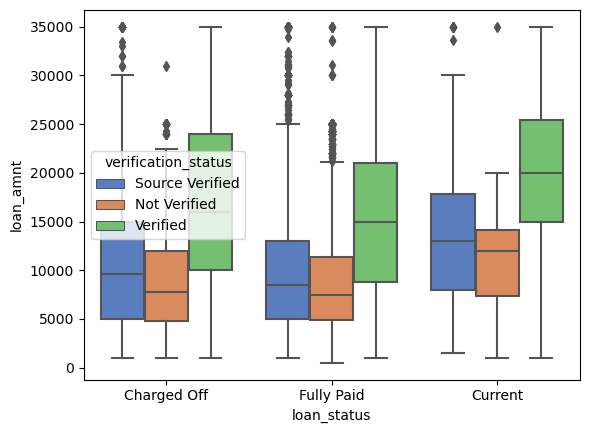

In [318]:
sns.boxplot(y="loan_amnt", x="loan_status", palette="muted", hue="verification_status", data=df)
plt.show()

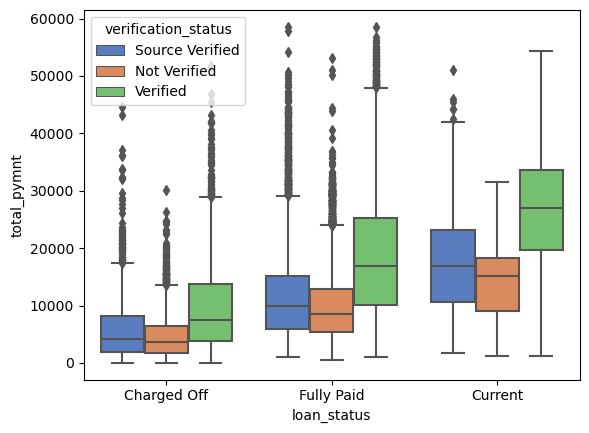

In [ ]:
sns.boxplot(y="total_pymnt", x="loan_status", palette="muted", hue="verification_status", data=df)
plt.show()

<Axes: ylabel='loan_amnt'>

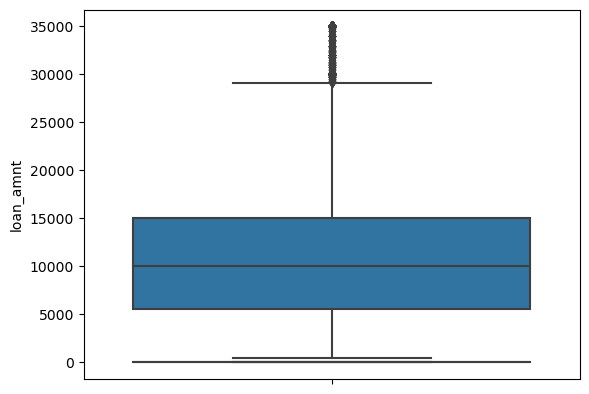

In [322]:
sns.boxplot(y="dti", data=df)

<Axes: ylabel='loan_amnt'>

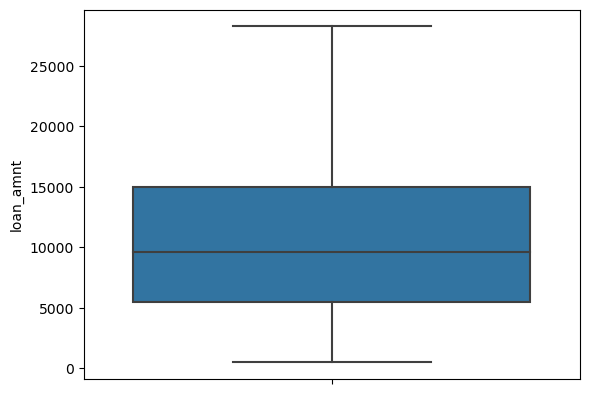

In [331]:
df = df[df.loan_amnt < 28500]
sns.boxplot(y="loan_amnt", data=df)

<Axes: ylabel='dti'>

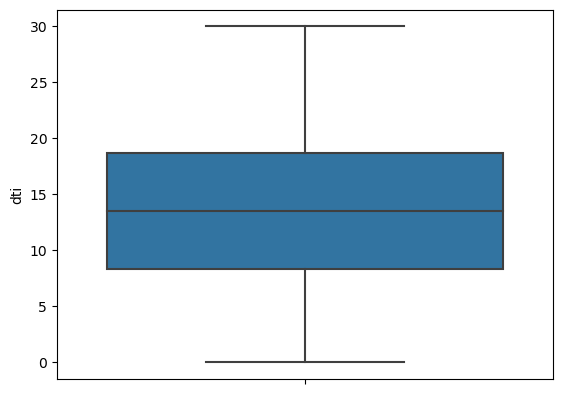

In [329]:
sns.boxplot(y="dti", data=df)

In [326]:
def dti_bucketing(dti):
    if (dti <= 8):
        return 'VERY LOW'
    if (dti > 8 and dti <=13):
        return 'LOW'
    if (dti > 13 and dti <=17):
        return 'MEDIUM'
    if (dti >= 17 and dti < 19):
        return 'HIGH'
    return 'VERY HIGH'
df['dti_bucket'] = df.dti.apply(dti_bucketing)
df.dti_bucket.value_counts()

VERY HIGH    8650
LOW          8649
VERY LOW     8555
MEDIUM       7350
HIGH         3227
Name: dti_bucket, dtype: int64

In [ ]:
df.corr() > 0.90

In [ ]:
df.funded_amnt.corr(df.loan_amnt)

In [ ]:
df.verification_status.value_counts()


In [ ]:
df.member_id